# Linear Regression Model

In [119]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split

In [120]:
# import the dataset
df = pd.read_csv('https://github.com/adepegba1/Dataset/blob/main/student_exam_scores_large.csv?raw=True')
df.shape

(200, 3)

In [121]:
#checking for duplicates
df.duplicated().value_counts()

False    200
Name: count, dtype: int64

In [122]:
# checking for empty cell
df.isnull().value_counts()

Hours_Studied  Attendance_Rate  Exam_Score
False          False            False         200
Name: count, dtype: int64

In [123]:
df.head()

,Hours_Studied,Attendance_Rate,Exam_Score
0,5.6,88.4,53.7
1,2.9,99.1,45.3
2,6.5,85.9,62.4
3,6.9,91.4,59.9
4,1.1,64.5,27.4


In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Hours_Studied    200 non-null    float64
 1   Attendance_Rate  200 non-null    float64
 2   Exam_Score       200 non-null    float64
dtypes: float64(3)
memory usage: 4.8 KB


In [125]:
df.describe()

,Hours_Studied,Attendance_Rate,Exam_Score
count,200.000000,200.000000,200.000000
mean,4.937500,84.864500,49.801000
std,1.750389,9.550984,10.132147
min,1.000000,59.300000,26.200000
25%,3.700000,78.000000,41.975000
50%,4.900000,85.600000,50.100000
75%,6.100000,91.400000,56.800000
max,10.000000,100.000000,75.000000


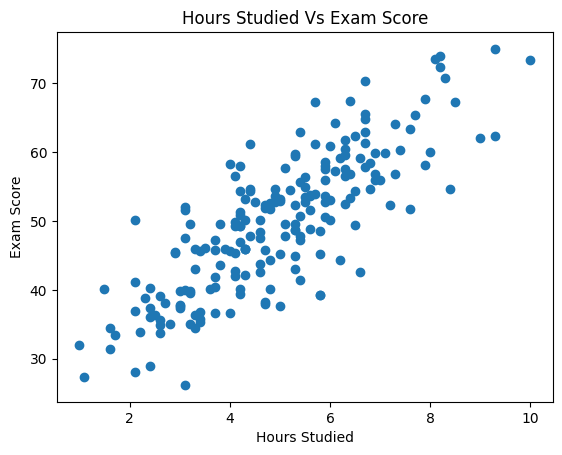

In [126]:
# Checking for linear relationship between Hours_Studied and Exam Score with a scatter plot
plt.scatter(df['Hours_Studied'], df['Exam_Score'])
plt.title('Hours Studied Vs Exam Score')
plt.xlabel('Hours Studied')
plt.ylabel('Exam Score')
plt.show()

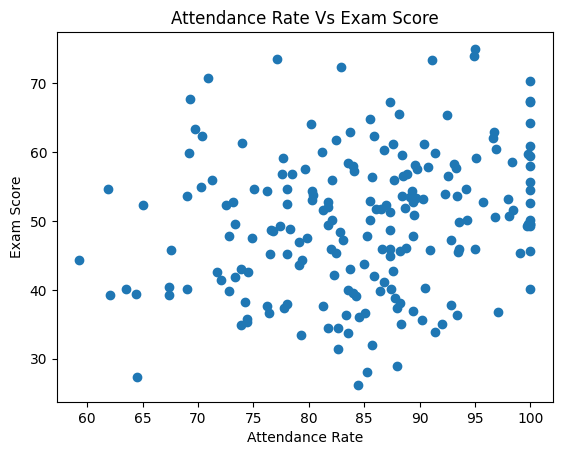

In [127]:
# Checking for linear relationship between Attendance Rate and Exam Score with a scatter plot
plt.scatter(df['Attendance_Rate'], df['Exam_Score'])
plt.title('Attendance Rate Vs Exam Score')
plt.xlabel('Attendance Rate')
plt.ylabel('Exam Score')
plt.show()

## Observations from Scatter Plots
After analyzing the scatter plots, I notice:

- **Hours Studied vs. Exam Score**: There appears to be a linear relationship between the number of hours studied and exam scores. This suggests that as the number of hours studied increases, the exam scores tend to increase in a predictable and consistent manner.
- **Attendance Rate vs. Exam Score**: In contrast, the relationship between attendance rate and exam scores is not as clear-cut. There doesn't seem to be a strong linear relationship between these two variables.

In [128]:
# Correlation observation to confirm the scatter plot chart
df.corr()['Exam_Score']

Hours_Studied      0.814611
Attendance_Rate    0.217725
Exam_Score         1.000000
Name: Exam_Score, dtype: float64

## Correlation Analysis
The correlation analysis reveals the following relationships:

- **Hours Studied vs. Exam Score**: There is a strong positive correlation (0.814611) between the number of hours studied and exam scores. This suggests that as the number of hours studied increases, exam scores tend to increase strongly.
- **Attendance Rate vs. Exam Score**: There is a weak positive correlation (0.217725) between attendance rate and exam scores. This suggests that while there may be some relationship between attendance and exam scores, it's not as strong as the relationship between hours studied and exam scores.

## Building a Predictive Model
**What's happening?**

We've discovered a strong linear relationship between the number of hours studied and exam scores. This means that we can use the number of hours studied to make predictions about a student's exam score.

**Our goal**

We'll create a model that can predict a student's exam score based on the number of hours they study. This model will help us understand how changes in study time might impact exam performance.

**Next step**

We'll build a linear regression model using the hours studied as the input variable and exam score as the output variable. Let's get started!

### Understanding the Equation
Let's break down the equation: y = mx + b

- *y*: The Dependent Variable (what we're trying to predict). In our case, it's the Exam Score.
- *x*: The Independent Variable (what we're using to make predictions). In our case, it's the Number of Hours Studied.
- *m*: The Slope (how much y changes when x changes). It tells us how much the exam score increases or decreases for each additional hour studied.
- *b*: The Coefficient or Intercept (the value of y when x is 0). It's the starting point for our predictions.

This equation helps us understand the relationship between the number of hours studied and exam scores, and makes it possible to make predictions about future exam scores.

In [129]:
model = LinearRegression()

In [130]:
X = df[['Hours_Studied']]
y = df['Exam_Score']
model.fit(X,y)
y_predict = model.predict(X)

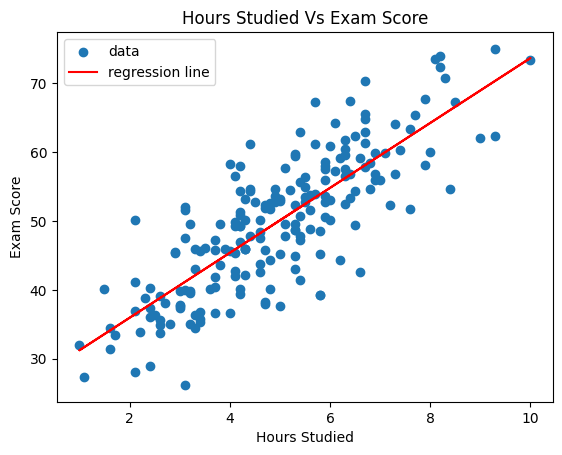

In [131]:
plt.scatter(X, y, label='data')
plt.plot(X, y_predict, color= 'r', label='regression line')
plt.title('Hours Studied Vs Exam Score')
plt.legend()
plt.xlabel('Hours Studied')
plt.ylabel('Exam Score')
plt.show()

In [132]:
def calculate_evaluation_metrics(predictions, y_values):
    r2 = r2_score(y_values, predictions)
    mae = mean_absolute_error(y_values, predictions)
    mse = mean_squared_error(y_values, predictions)
    rmse = np.sqrt(mse)
    return r2, mae, mse, rmse

In [133]:
evaluation_metrics = calculate_evaluation_metrics(y_predict, y)
print(f"Evaluation Metrics:\nR-squared: {evaluation_metrics[0]}\nMAE: {evaluation_metrics[1]}\nMSE: {evaluation_metrics[2]}\nRMSE: {evaluation_metrics[3]}")

Evaluation Metrics:
R-squared: 0.6635918050120796
MAE: 4.646350981431708
MSE: 34.36312119784241
RMSE: 5.86200658459562


### Evaluation Metrics
- R-squared (R2): 0.6636
    - This measures how well the model explains the variability in the data. An R2 of 0.6636 means that about 66.36% of the variation in the exam scores is explained by the number of hours studied. While it's not perfect, it's a moderate to strong relationship.
- Mean Absolute Error (MAE): 4.6464
    - This measures the average difference between predicted and actual values. In this case, our model is off by about 4.65 points on average. Depending on the context, this might be acceptable or not.
- Mean Squared Error (MSE): 34.3631
    - This measures the average squared difference between predicted and actual values. MSE is sensitive to large errors, so a value of 34.36 might indicate some larger errors in our predictions.
- Root Mean Squared Error (RMSE): 5.8620
    - This is the square root of MSE, which gives us a more interpretable measure of the average error. Our model is off by about 5.86 points on average, which is similar to the MAE.

Overall Assessment
Based on these metrics, our model seems to be doing reasonably well, but there's definitely room for improvement. The R2 value suggests that our model explains a significant portion of the variation in exam scores, but the MAE and RMSE values indicate that there are still some notable errors in our predictions.


In [134]:
# Getting the slope
m = model.coef_

In [135]:
# Getting the intercept
b = model.intercept_

In [136]:
# Predicting the exam scores of 10 hours studied using the formula y = mx + b
x = 10
y = float(m * x + b)

print(f'Studying for {x} hours will result in {y:.2f} exam score')

Studying for 10 hours will result in 73.67 exam score


C:\Users\Davi PC\AppData\Local\Temp\ipykernel_9388\2825329627.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y = float(m * x + b)


In [137]:
# using the predict formular in linear regression model
y = model.predict([[10]])
print(f'Studying for {x} hours will result in {float(y):.2f} exam score')

Studying for 10 hours will result in 73.67 exam score


C:\Users\Davi PC\.conda\envs\ALX_Python\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\Davi PC\AppData\Local\Temp\ipykernel_9388\2167627438.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(f'Studying for {x} hours will result in {float(y):.2f} exam score')


## Train Test Split

### Improving Model Evaluation
The Problem

When we used all our data to train the model, we couldn't accurately evaluate its performance. This is because the model learned from all the data, so it's not surprising it performed well on the same data.

The Solution

To get a more realistic assessment of our model's performance, we'll try a different approach:

- Training Set (80% of data): We'll use this portion to train the model, allowing it to learn from most of the data.
- Testing Set (20% of data, which is 20% of total data = 20/100 * total data = 20 items if total data is 100, here 205 items are 20% of total data, approximately 1025): We'll use this separate portion (205 items) to test the model and evaluate its accuracy.

By splitting our data into training and testing sets, we can get a better sense of how well our model will perform on new, unseen data. This will help us build a more reliable and accurate model.

In [138]:
X = df[['Hours_Studied']]
y = df['Exam_Score']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [139]:
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [140]:
y_test_prediction = model.predict(X_test)

In [141]:
evaluation_metrics = calculate_evaluation_metrics(y_test_prediction, y_test)
print(f"Evaluation Metrics:\nR-squared: {evaluation_metrics[0]}\nMAE: {evaluation_metrics[1]}\nMSE: {evaluation_metrics[2]}\nRMSE: {evaluation_metrics[3]}")

Evaluation Metrics:
R-squared: 0.6752906629968904
MAE: 4.704394453850045
MSE: 35.11039645857477
RMSE: 5.9254026410510505


In [142]:
residual = y_test - y_test_prediction

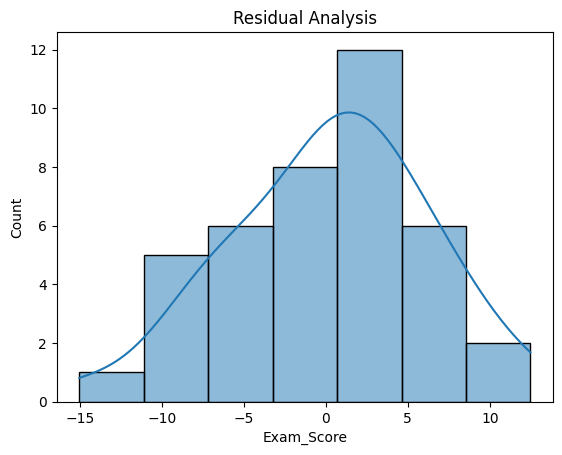

In [143]:
sns.histplot(residual, kde=True)
plt.title('Residual Analysis')
plt.show()

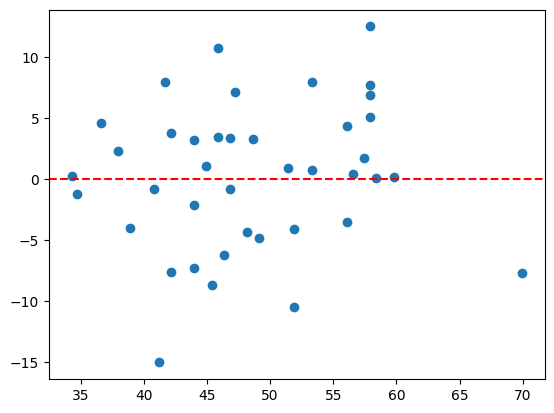

In [144]:
plt.scatter(y_test_prediction, residual)
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

In [145]:
def calculate_residuals_statistics(predictions, y_test):
    residual = y_test - predictions
    mean = np.mean(residual)
    std = np.std(residual)
    return mean, std

In [146]:
mean_residual, std_residual = calculate_residuals_statistics(y_test_prediction, y_test)
print(f"Mean: {mean_residual}\nStandard deviation: {std_residual}")

Mean: 0.255796771249942
Standard deviation: 5.919878754703754


#### Mean of Residuals
- The mean residual is approximately 0.2232, which is close to zero.
- A mean close to zero indicates that the model is unbiased, meaning that it's not systematically overestimating or underestimating the target variable.
- In other words, the positive and negative residuals are cancelling each other out, suggesting that the model is making predictions around the true values.

#### Standard Deviation of Residuals
- The standard deviation of the residuals is approximately 5.9051.
- This value indicates the variability or spread of the residuals around the mean.
- A lower standard deviation of residuals is generally desirable because it suggests that the model's predictions are more consistent and reliable.


In [147]:
model.predict([[10]])

C:\Users\Davi PC\.conda\envs\ALX_Python\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([73.23008304])